In [1]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [2]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).count()
day_average.head()


,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


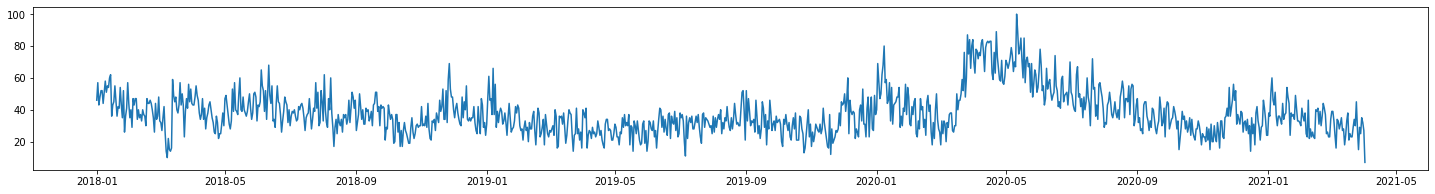

In [3]:
plt.figure(figsize=(25,3))
plt.plot(day_average.index, day_average['Rating'])

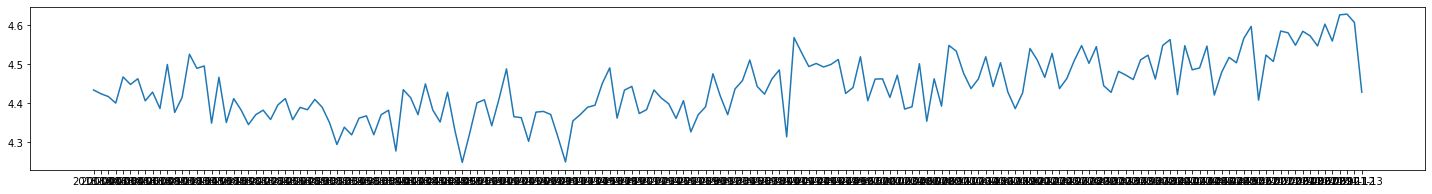

In [4]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()
plt.figure(figsize=(25,3))
plt.plot(week_average.index, week_average['Rating'])

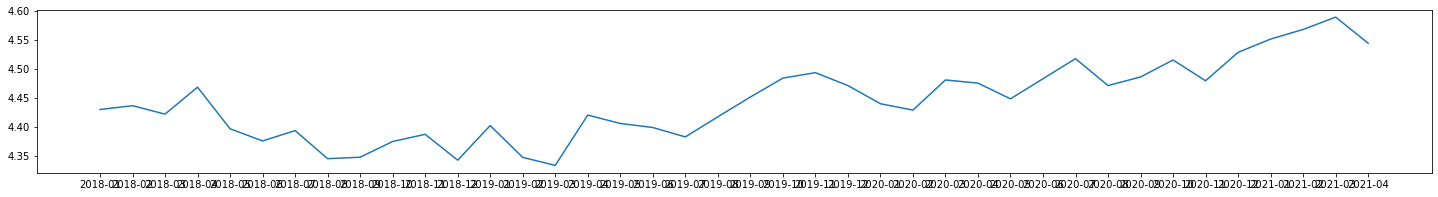

In [5]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()
plt.figure(figsize=(25,3))
plt.plot(month_average.index, month_average['Rating'])

<AxesSubplot:xlabel='Month'>

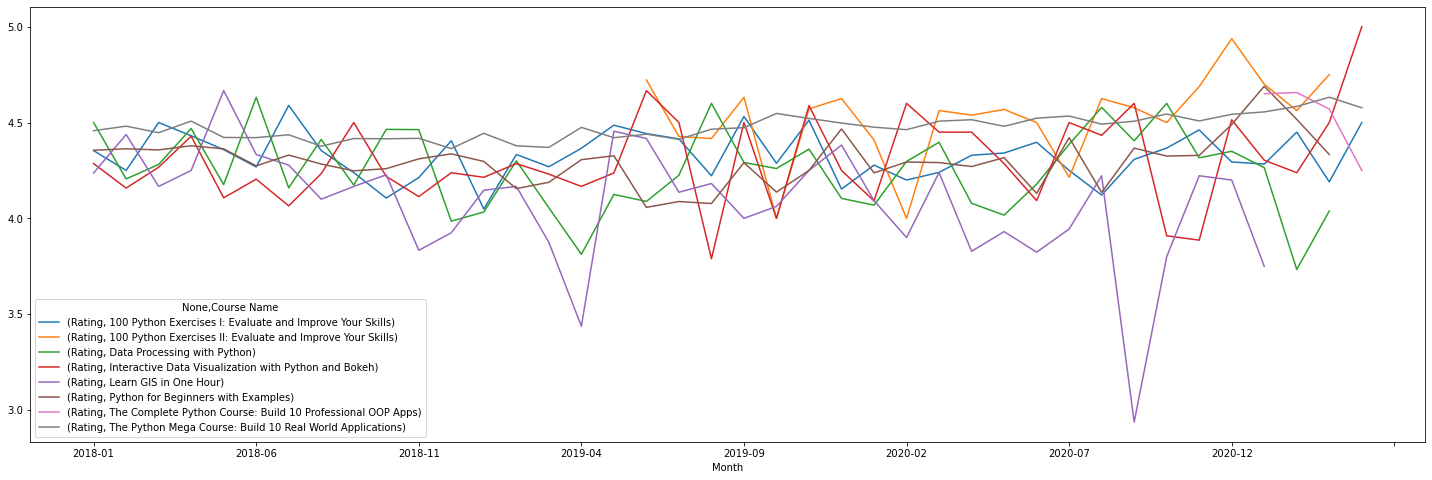

In [6]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack()
month_average_crs.plot(figsize=(25,8))

<AxesSubplot:xlabel='Weekday,Daynumber'>

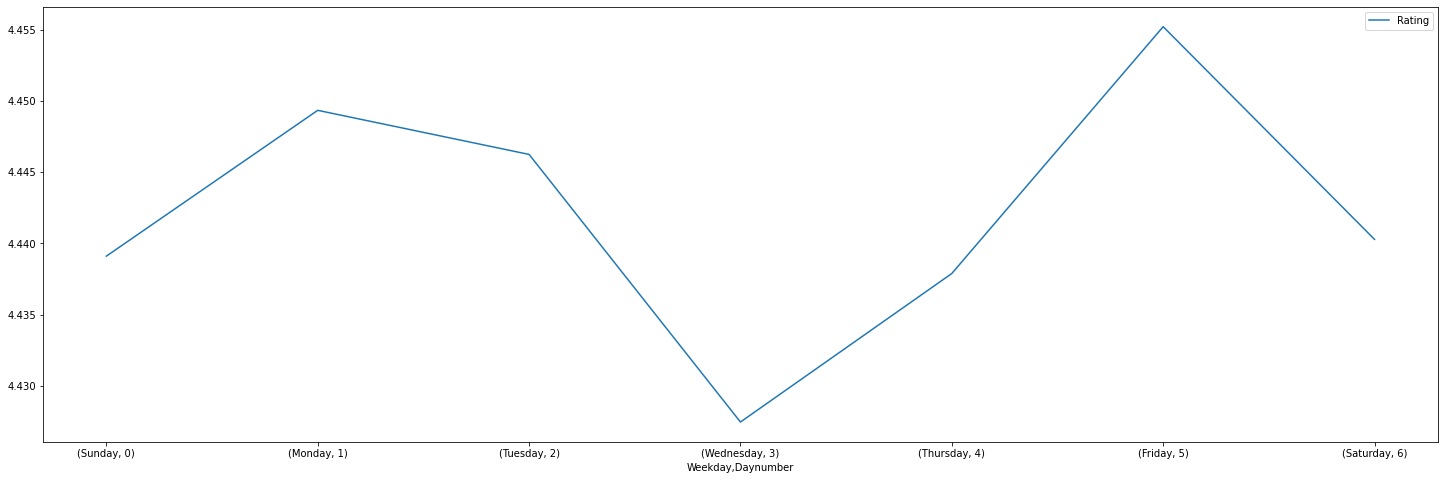

In [7]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')
weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values(['Daynumber'])
weekday_average.plot(figsize=(25, 8))